<a href="https://colab.research.google.com/github/pegahahadian/university/blob/main/gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym

Reinforcement learning is learning how to map situations to actions so as to maximize a numerical reward signal. Gym is a toolkit for developing and comparing reinforcement learning algorithms.

In [ ]:
import gym
import random
import numpy as np

Play one game of blackjack with random actions

In [ ]:
env = gym.make("Blackjack-v0")
state = env.reset()
memory = []
for _ in range(10):
  action = env.action_space.sample() 
  state, reward, done, info = env.step(action)
  memory.append((state,action,reward,done))
  if done:
    break

Calling env.step gives us an observation, reward, a boolean indicating whether the episode has finished

In [ ]:
env.step

<bound method BlackjackEnv.step of <gym.envs.toy_text.blackjack.BlackjackEnv object at 0x7fa692b21ed0>>

In [ ]:
memory

[((12, 10, False), 0, -1.0, True)]

**States**


 The observation is a 3-tuple of: 
the players current sum,
the dealer's one showing card (1-10 where 1 is ace),
and whether or not the player holds a usable ace (0 or 1).

**Actions**

In [ ]:
env.action_space
# Stay = 0
# Hit = 1

Discrete(2)

**Rewards**

In [ ]:
# Win = 1
# Loss = -1

def compute_avg_reward(memory):
  rewards = [r[2] for r in memory]
  return sum(rewards)/len(memory)

compute_avg_reward(memory)

-1.0

Now lets play 100 games of random blackjack. We'll keep track of our score.

In [ ]:
env = gym.make("Blackjack-v0")
state = env.reset()
memory = []
episodes = 100
for e in range(episodes):
  for _ in range(10):
    action = env.action_space.sample() 
    state, reward, done, info = env.step(action)
    memory.append((state,action,reward,done))
    if done:
      break

In [ ]:
rewards = [r[2] for r in memory]
sum(rewards)

-100.0

Let's try building a simple agent.

In [ ]:
class RuleBasedAgent():
  
  def __init__(self,epsilon):
    self.epsilon = epsilon
  
  def act(self,state):
    if state[0]>=17:
      return 0
    else:
      return 1

In [ ]:
env = gym.make("Blackjack-v0")

memory = []
agent = RuleBasedAgent(.1)
episodes = 100
for e in range(episodes):
  state = env.reset()
  for _ in range(10):
    action = agent.act(state) 
    state, reward, done, info = env.step(action)
    memory.append((state,action,reward,done))
    if done:
      break

In [ ]:
compute_avg_reward(memory)

-0.029069767441860465

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
from plotly.offline import iplot
from xgboost import XGBRegressor
from sklearn.svm import SVR
import scipy as sp
import os
import re
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, ElasticNet, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler, RobustScaler

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving GS_Dual_Bandit_log_uniform.csv to GS_Dual_Bandit_log_uniform (1).csv


In [ ]:
import pandas as pd 
import io 

# df = pd.read_csv(io.BytesIO(uploaded['country_vaccinations.csv'])) 
df = pd.read_csv('GS_Dual_Bandit_log_uniform (1).csv') 
df.head()

,AgentStats.Q0_025,AgentStats.Q0_500,AgentStats.Q0_975,Alg,Samples
0,0.167811,0.169087,0.170370,Dual Bandit log (alpha = 0.0),5000
1,0.168135,0.169413,0.170697,Dual Bandit log (alpha = 0.8),5000
2,0.167717,0.168993,0.170276,Dual Bandit log (alpha = 0.85),5000
3,0.168048,0.169326,0.170610,Dual Bandit log (alpha = 0.9),5000
4,0.167865,0.169142,0.170425,Dual Bandit log (alpha = 0.925),5000


In [ ]:
df.describe()


,AgentStats.Q0_025,AgentStats.Q0_500,AgentStats.Q0_975,Samples
count,11.000000,11.000000,11.000000,11.0
mean,0.168212,0.169490,0.170775,5000.0
std,0.000447,0.000448,0.000450,0.0
min,0.167717,0.168993,0.170276,5000.0
25%,0.167870,0.169147,0.170430,5000.0
50%,0.168135,0.169413,0.170697,5000.0
75%,0.168405,0.169684,0.170969,5000.0
max,0.168993,0.170275,0.171562,5000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AgentStats.Q0_025  11 non-null     float64
 1   AgentStats.Q0_500  11 non-null     float64
 2   AgentStats.Q0_975  11 non-null     float64
 3   Alg                11 non-null     object 
 4   Samples            11 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 568.0+ bytes


In [ ]:
df.groupby("Alg")["AgentStats.Q0_975"].mean().sort_values(ascending= False).head(10)

Alg
Dual Bandit log (alpha = 0.9999)    0.171562
Dual Bandit log (alpha = 1.0)       0.171509
Dual Bandit log (alpha = 0.999)     0.171195
Dual Bandit log (alpha = 0.99)      0.170744
Dual Bandit log (alpha = 0.975)     0.170699
Dual Bandit log (alpha = 0.8)       0.170697
Dual Bandit log (alpha = 0.9)       0.170610
Dual Bandit log (alpha = 0.95)      0.170435
Dual Bandit log (alpha = 0.925)     0.170425
Dual Bandit log (alpha = 0.0)       0.170370
Name: AgentStats.Q0_975, dtype: float64

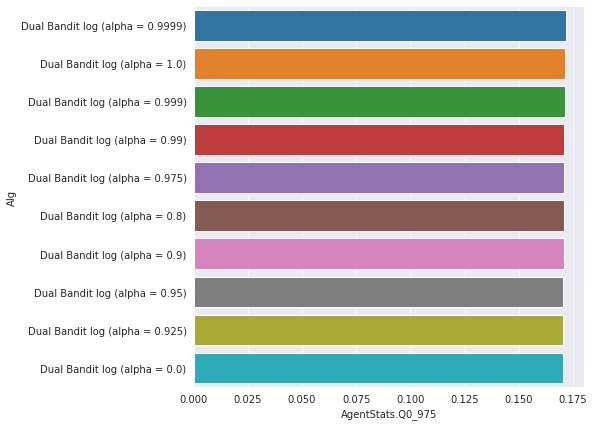

In [ ]:
#barplot visualization of top countries with most vaccinations
x= df.groupby("Alg")["AgentStats.Q0_975"].mean().sort_values(ascending= False).head(10)
sns.set_style("darkgrid")
plt.figure(figsize= (7,7))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("AgentStats.Q0_975")
ax.set_ylabel("Alg")
plt.show()